Started
Looking for file at: C:\Users\LANKA MUDDU KRISHNA\OneDrive\Desktop\InfosysProject\Fraud_detection_pipeline\data\processed\train.csv
File exists? True
Dataset shape: (1000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 482 to 1649
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transaction_id      1000 non-null   object
 1   customer_id         1000 non-null   object
 2   kyc_verified        1000 non-null   int64 
 3   account_age_days    1000 non-null   int64 
 4   transaction_amount  1000 non-null   int64 
 5   timestamp           1000 non-null   object
 6   is_fraud            1000 non-null   int64 
 7   year                1000 non-null   int64 
 8   month               1000 non-null   int64 
 9   day                 1000 non-null   int64 
 10  hour                1000 non-null   int64 
 11  day_of_week         1000 non-null   int64 
 12  channel_ATM         1000 non-null  

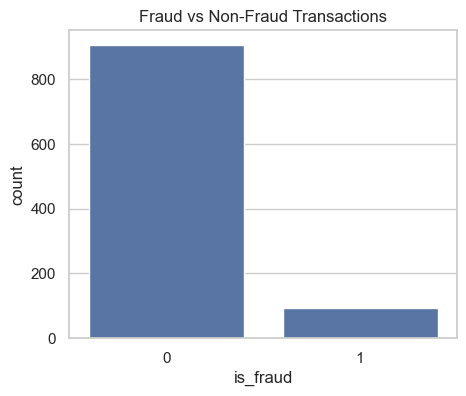

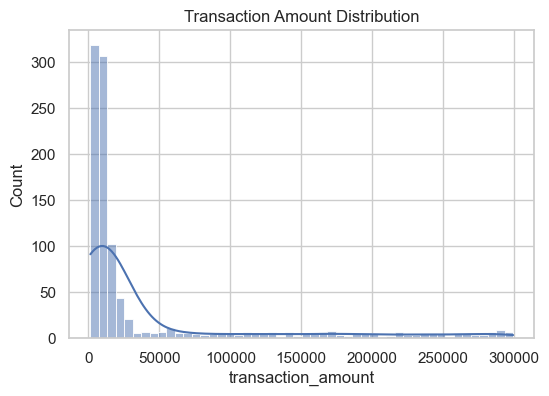

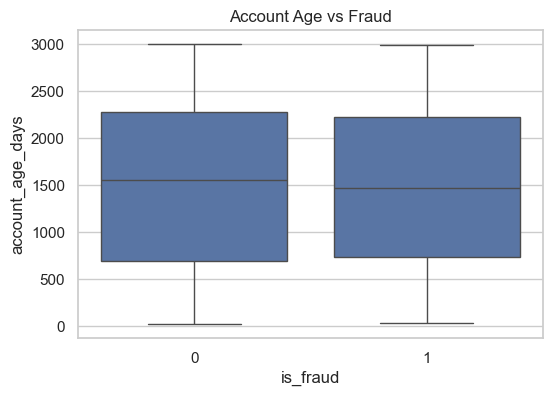

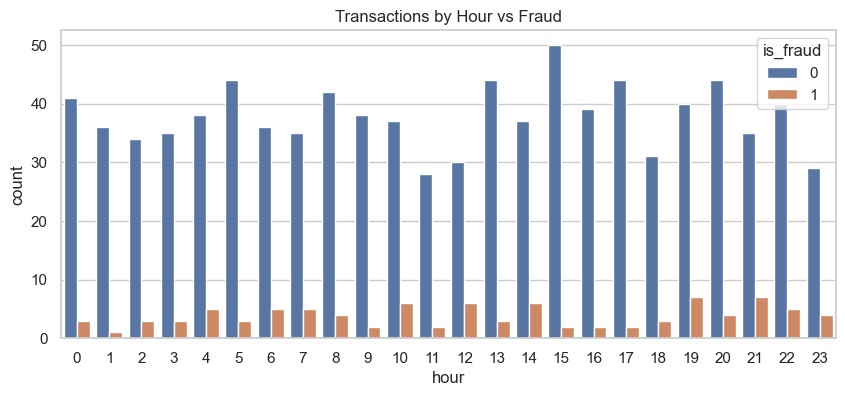

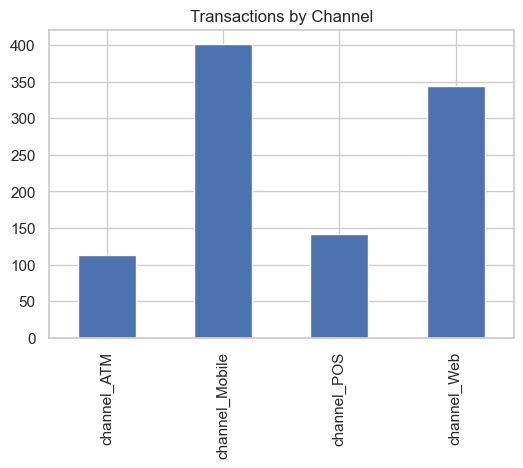

completed ✅


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Started")

# ✅ Define your project root (absolute path to your project folder)
PROJECT_ROOT = r"C:\Users\LANKA MUDDU KRISHNA\OneDrive\Desktop\InfosysProject\Fraud_detection_pipeline"

# ✅ Build path dynamically
data_path = os.path.join(PROJECT_ROOT, "data", "processed", "train.csv")

# 🚀 Debug check
print("Looking for file at:", data_path)
print("File exists?", os.path.exists(data_path))

# ✅ Load dataset safely
if os.path.exists(data_path):
    train_df = pd.read_csv(data_path)
else:
    raise FileNotFoundError(f"train.csv not found at: {data_path}")

# Use a sample for faster plotting
SAMPLE_SIZE = 1000  # adjust as needed
eda_df = train_df.sample(n=min(SAMPLE_SIZE, len(train_df)), random_state=42)

# Quick info
print("Dataset shape:", eda_df.shape)
print(eda_df.info())
print(eda_df.describe())
print("Fraud counts:\n", eda_df["is_fraud"].value_counts())

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Fraud distribution
plt.figure(figsize=(5,4))
sns.countplot(x="is_fraud", data=eda_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# 2️⃣ Transaction amount distribution
plt.figure(figsize=(6,4))
sns.histplot(eda_df["transaction_amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# 3️⃣ Account age vs Fraud
plt.figure(figsize=(6,4))
sns.boxplot(x="is_fraud", y="account_age_days", data=eda_df)
plt.title("Account Age vs Fraud")
plt.show()

# 4️⃣ Hour of transaction vs Fraud
plt.figure(figsize=(10,4))
sns.countplot(x="hour", hue="is_fraud", data=eda_df)
plt.title("Transactions by Hour vs Fraud")
plt.show()

# 5️⃣ Channel distribution (one-hot encoded)
channel_cols = [col for col in eda_df.columns if col.startswith("channel_")]
if channel_cols:
    plt.figure(figsize=(6,4))
    eda_df[channel_cols].sum().plot(kind="bar")
    plt.title("Transactions by Channel")
    plt.show()

print("completed ✅")
